## **Makine Öğrenmesi Denetimsiz Öğrenme** 

In [1]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_10 (01.12.22-07.12.22) ml/machine_learning/datasets/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


* **Amaç eyaletleri segmentlere/gruplara ayırmak.**

In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


* **Aykırı değer olmadığını anlıyorum çünkü veriler arası değerler farkı çok uçuk değil.**


In [8]:
# K-Means
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df) # bir np arraye çevirir
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

* **Uzaklık temelli ya da Gradient Descent temelli yöntemler kullanılacağı zaman değişkenlerin standartlaştırılması gerekmektedir.**

In [9]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)  #sadece bağımsız değişkenleri barındırır çünkü unsupervised
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [10]:
kmeans.n_clusters  #küme sayısı

4

In [11]:
kmeans.cluster_centers_ #kümenin merkezleri

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [12]:
kmeans.labels_ # her bir gözlemin k-means tarafından belirlenen kümeleri

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [13]:
kmeans.inertia_  #SSE SSD SSR a karşılık gelen değer(en yakın clustera olan uzaklıklar)

3.6834561535859134

### **Optimum Küme Sayısının Belirlenmesi**

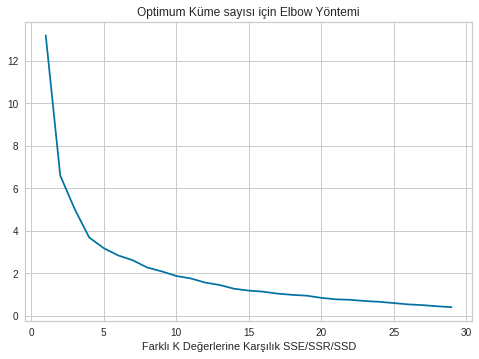

In [14]:
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

* **Elbow yöntemi sadece bir ön fikir elde etmeye yarar, kaç kümeye ayıracağın senin iş bilgine bağlı olarak şekillenmelidir.**

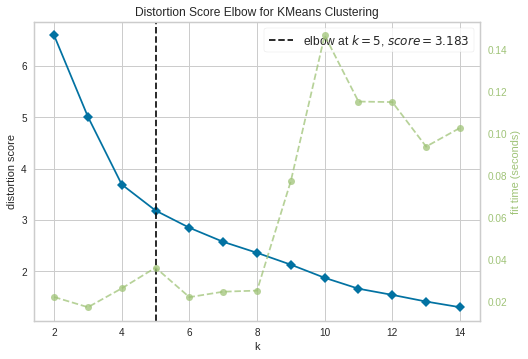

In [15]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 15))
elbow.fit(df)
elbow.show()

In [16]:
elbow.elbow_value_

5

### **Final Cluster'ların Oluşturulması**

In [17]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

print(kmeans.n_clusters)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(df[0:5])

5
[[0.2383821  0.268591   0.84503632 0.2266519 ]
 [0.6124498  0.75       0.75423729 0.67980189]
 [0.37700803 0.36957763 0.56073446 0.35400517]
 [0.13805221 0.10616438 0.34039548 0.1171404 ]
 [0.83562823 0.70645793 0.37772397 0.37172388]]
[4 1 1 2 1 1 0 2 1 4 0 3 1 2 3 2 2 4 3 1 0 1 3 4 2 3 3 1 3 0 1 1 4 3 2 2 2
 0 0 4 3 4 1 0 3 2 2 3 3 2]
[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]]


* **Hangi eyalet hangi kümede bilinmiyor. Hem gözlem birimini hem de hangi gözlem nerede bilgisini öğrenmek için aşağıdaki kodlar kullanılır.**

In [18]:
clusters = kmeans.labels_

In [19]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_10 (01.12.22-07.12.22) ml/machine_learning/datasets/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [20]:
df["cluster"] = clusters

In [21]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [22]:
df["cluster"] = df["cluster"] + 1
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


In [23]:
df[df["cluster"] == 1]

,Murder,Assault,UrbanPop,Rape,cluster
Connecticut,3.3,110,77,11.1,1
Hawaii,5.3,46,83,20.2,1
Massachusetts,4.4,149,85,16.3,1
New Jersey,7.4,159,89,18.8,1
Pennsylvania,6.3,106,72,14.9,1
Rhode Island,3.4,174,87,8.3,1
Utah,3.2,120,80,22.9,1


In [24]:
df[df["cluster"] == 5]

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Georgia,17.4,211,60,25.8,5
Louisiana,15.4,249,66,22.2,5
Mississippi,16.1,259,44,17.1,5
North Carolina,13.0,337,45,16.1,5
South Carolina,14.4,279,48,22.5,5
Tennessee,13.2,188,59,26.9,5


In [25]:
df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1            7   4.757143    4.4       7  123.428571  120.0        7   
2           12  10.966667   11.2      12  264.000000  259.0       12   
3           12   7.058333    7.0      12  152.916667  153.5       12   
4           12   3.091667    2.6      12   76.000000   76.5       12   
5            7  14.671429   14.4       7  251.285714  249.0        7   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        81.857143   83.0     7  16.071429  16.30  
2        76.500000   80.0    12  33.608333  32.00  
3        65.083333   66.5    12  21.000000  20.35  
4        52.083333   53.5    12  11.833333  11.25  
5        54.285714   58.0     7  21.685714  22.20

* **Sadece algoritmanın verdiğine bakmak yetmez. Çıkan kümelerin betimlenmesi gerekmektedir.** 

* **Murder bu veri seti için önemlidir, ortalamalara bakıldığında sanki 1-3 ve 5 clusterları birleştirilebilir.** 

In [26]:
df.to_csv("/content/gdrive/MyDrive/DSMLBC10/week_13 (22.12.22-28.12.22) ml/clusters.csv") #csv olarak kaydetmek için.

### **Hiyerarşik Kümeleme**

In [27]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_10 (01.12.22-07.12.22) ml/machine_learning/datasets/USArrests.csv", index_col=0)
sc = MinMaxScaler((0, 1))

In [28]:
df = sc.fit_transform(df)

In [29]:
hc_average = linkage(df, "average") 

* **Linkage birleştirici bir clustering yöntemidir.**

* **Öklid uzaklığına göre kümeleri gözlem birimlerine ayırır. İteratif olarak en benzerlerini bulup bir araya getirir.**

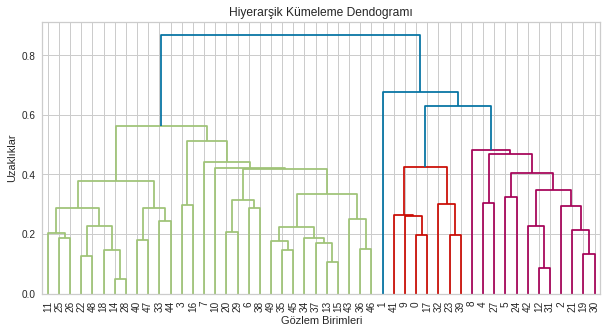

In [30]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10) #en aşağıda görülen isimlendirmelerin boyutu/gözlem birimleri
plt.show()

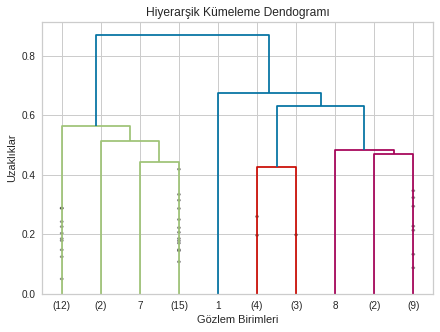

In [31]:
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

* **Hiyerarşik kümeleme yönteminin avantajı gözlem birimlerine genelden bakma imkanı tanır.**

### **Küme Sayısını Belirlemek**

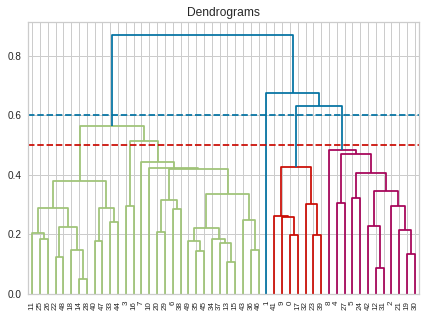

In [32]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")

dend  = dendrogram(hc_average)

plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

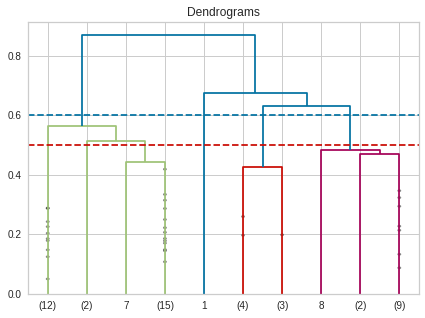

In [33]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")

dend  = dendrogram(hc_average,
                   truncate_mode="lastp",
                   p=10,
                   show_contracted=True,
                   leaf_font_size=10)

plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

### **Final Modeli Oluşturmak**

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

In [36]:
clusters = cluster.fit_predict(df)
clusters

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0])

In [37]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_10 (01.12.22-07.12.22) ml/machine_learning/datasets/USArrests.csv", index_col=0)

In [38]:
clusters_kmeans = kmeans.labels_

In [39]:
df["kmeans_cluster_no"] = clusters_kmeans

In [40]:
df["kmeans_cluster_no"] = df["kmeans_cluster_no"]  + 1

In [41]:
df["hi_cluster_no"] = clusters

In [42]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [43]:
df.head()

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_no,hi_cluster_no
Alabama,13.2,236,58,21.2,5,4
Alaska,10.0,263,48,44.5,2,3
Arizona,8.1,294,80,31.0,2,2
Arkansas,8.8,190,50,19.5,3,1
California,9.0,276,91,40.6,2,2


### **Principal Component Analysis (PCA)**

In [44]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_10 (01.12.22-07.12.22) ml/machine_learning/datasets/hitters.csv")

In [45]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [46]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [47]:
df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [48]:
df = df[num_cols]

In [49]:
df.dropna(inplace=True)

In [50]:
df.shape

(322, 16)

In [51]:
df = StandardScaler().fit_transform(df)

In [52]:
pca = PCA()
pca_fit = pca.fit_transform(df)

In [53]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

* **Yukarıdaki değerler PCA in açıkladığı kümülatif varyans (bilgi) oranlarını ifade eder. Bu bileşenler bir araya geldiğinde toplam bilginin ne kadarının açıklandığına da aşağıdaki kod yardımıyla ulaşılır.**

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

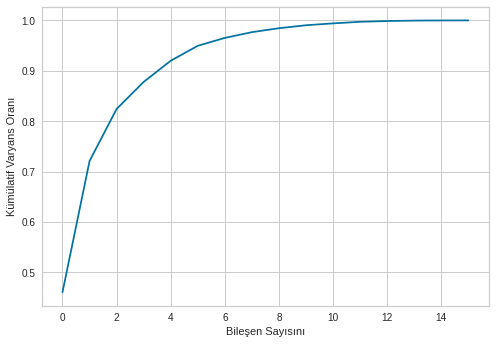

In [55]:
# Optimum Bileşen Sayısı
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [56]:
# Final PCA'in Oluşturulması
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [57]:
np.cumsum(pca.explained_variance_ratio_)

#100 değişken varsa daha az gözlem ile bu veri setini temsil etmek istiyordum. Boyut indirgeme yaptık.

array([0.46037855, 0.72077704, 0.82416565])

### **BONUS: Principal Component Regression (PCR)**

* Hitters verisi doğrusal model ile modellenmek isteniyor fakat değişkenler arasında çoklu doğrusal bağlantı problemi var. Değişkenler arası yüksek korelasyon istenmez.

* 16 adet sayısal değişken 3 değişkene indirgenir, yanına kategorik değişkenler eklenir ve model kurulur. 

In [59]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_10 (01.12.22-07.12.22) ml/machine_learning/datasets/hitters.csv")
df.shape

(322, 20)

In [60]:
len(pca_fit) #gözlem birimlerim aynı yerinde.

322

In [61]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)

#yukarıda 16 değişkeni 3 tane bileşene indirgemiştik.

16

In [62]:
others = [col for col in df.columns if col not in num_cols]
others

['League', 'Division', 'Salary', 'NewLeague']

In [63]:
pd.DataFrame(pca_fit, columns = ["PC1","PC2","PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [64]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [65]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)

In [66]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [68]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

* Bütün kategorik değişkenlerin sınıf sayısı 2 olduğundan label encoder uygulanmıştır.

In [69]:
for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

In [70]:
final_df.dropna(inplace=True)

In [71]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [72]:
lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

345.60211063519677

In [73]:
y.mean()

535.9258821292775

In [74]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

397.82472262336137

In [75]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [76]:
# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [77]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

In [78]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

330.1964109339104

### **BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme**

In [79]:
# Breast Cancer
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_10 (01.12.22-07.12.22) ml/machine_learning/datasets/breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [80]:
y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

#çok değişkenli bir veriyi iki boyuta indirgemeye çalışacağız.

In [81]:
df.shape

(569, 32)

In [82]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)
pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [83]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

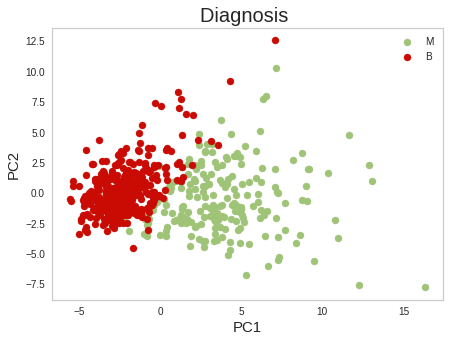

In [84]:
plot_pca(pca_df, "diagnosis")

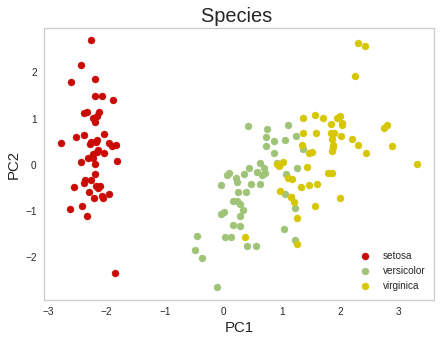

In [85]:
# Iris
import seaborn as sns
df = sns.load_dataset("iris")

y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "species")

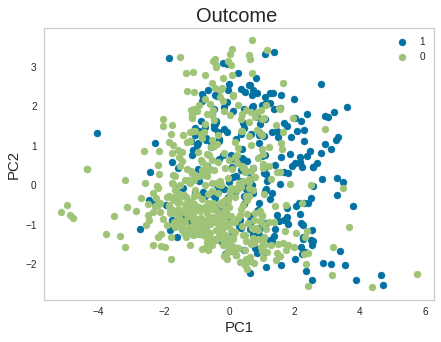

In [86]:
# Diabetes
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_11 (08.12.22-14.12.22) ml/dataset/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")